<a href="https://colab.research.google.com/github/UgurOKarapunar/BanksChurn/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Task 1 Solution**


In [1]:
import zipfile
import os

def unzip_file(zip_file_path, extract_to_folder):

    if not os.path.exists(zip_file_path):
        print(f"The zip file {zip_file_path} does not exist.")
        return
    if not os.path.exists(extract_to_folder):
        os.makedirs(extract_to_folder)

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_folder)
        print(f"Files extracted to {extract_to_folder}")

zip_file_path = "/content/Homework/xjL1dOBlTgOOdJCxEWQK_face_recognition_files (2) (1).zip"

extract_to_folder = "/content"

unzip_file(zip_file_path, extract_to_folder)

Files extracted to /content


**Face Recognition**

In [2]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 70.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=3309f379affe944d7afb731066ca44250517fd8f2f592f1f4ea6f5d7ead4feb2
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [3]:
from deepface import DeepFace
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

24-08-22 17:13:10 - Directory /root/.deepface has been created
24-08-22 17:13:10 - Directory /root/.deepface/weights has been created


In [5]:
def analyze_images_in_directory(root_path):

    image_paths = [os.path.join(root_path, f) for f in os.listdir(root_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    results = []

    for path in image_paths:

        result = DeepFace.analyze(path, actions=["age", "gender", "race", "emotion"])

        for idx, face in enumerate(result):
            results.append(
              {
                    "image_path": path,
                    "face_index": idx,
                    "age": face["age"],
                    "gender": face["dominant_gender"],
                    "race": face["dominant_race"],
                    "emotion": face["dominant_emotion"]

            })

    return results

In [7]:
analyze_images_in_directory("/content/face_recognition_files/faces_assignment")

Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5


24-08-22 17:17:45 - age_model_weights.h5 will be downloaded...



  0%|          | 0.00/539M [00:00<?, ?B/s]
  5%|▍         | 26.7M/539M [00:00<00:01, 265MB/s]
 10%|▉         | 53.5M/539M [00:00<00:02, 232MB/s]
 14%|█▍        | 77.1M/539M [00:00<00:01, 231MB/s]
 19%|█▊        | 101M/539M [00:00<00:01, 226MB/s] 
 23%|██▎       | 124M/539M [00:00<00:02, 206MB/s]
 27%|██▋       | 145M/539M [00:00<00:02, 178MB/s]
 30%|███       | 164M/539M [00:00<00:02, 161MB/s]
 33%|███▎      | 180M/539M [00:00<00:02, 162MB/s]
 37%|███▋      | 201M/539M [00:01<00:01, 173MB/s]
 41%|████      | 220M/539M [00:01<00:01, 179MB/s]
 44%|████▍     | 239M/539M [00:01<00:01, 168MB/s]
 47%|████▋     | 256M/539M [00:01<00:01, 158MB/s]
 51%|█████     | 272M/539M [00:01<00:01, 153MB/s]
 53%|█████▎    | 288M/539M [00:01<00:01, 150MB/s]
 56%|█████▌    | 303M/539M [00:06<00:22, 10.7MB/s]
 62%|██████▏   | 332M/539M [00:06<00:11, 18.3MB/s]
 65%|██████▍   | 349M/539M [00:06<00:08, 23.6MB/s]
 72%|███████▏  | 386M/539M [00:06<00:03, 41.1MB/s]
 76%|███████▌  | 408M/539M [00:06<00:02, 53.3MB/

24-08-22 17:17:57 - gender_model_weights.h5 will be downloaded...



  0%|          | 0.00/537M [00:00<?, ?B/s]
  7%|▋         | 39.3M/537M [00:00<00:01, 392MB/s]
 15%|█▍        | 78.6M/537M [00:00<00:01, 365MB/s]
 21%|██▏       | 115M/537M [00:00<00:01, 292MB/s] 
 27%|██▋       | 146M/537M [00:00<00:01, 282MB/s]
 33%|███▎      | 176M/537M [00:00<00:01, 270MB/s]
 38%|███▊      | 203M/537M [00:00<00:01, 234MB/s]
 43%|████▎     | 229M/537M [00:00<00:01, 240MB/s]
 47%|████▋     | 254M/537M [00:01<00:01, 221MB/s]
 52%|█████▏    | 277M/537M [00:01<00:01, 223MB/s]
 57%|█████▋    | 304M/537M [00:01<00:00, 235MB/s]
 61%|██████    | 328M/537M [00:01<00:00, 233MB/s]
 65%|██████▌   | 351M/537M [00:01<00:00, 199MB/s]
 69%|██████▉   | 372M/537M [00:01<00:00, 166MB/s]
 73%|███████▎  | 391M/537M [00:01<00:00, 167MB/s]
 76%|███████▌  | 408M/537M [00:01<00:00, 156MB/s]
 79%|███████▉  | 425M/537M [00:02<00:00, 149MB/s]
 82%|████████▏ | 441M/537M [00:02<00:00, 144MB/s]
 85%|████████▍ | 456M/537M [00:02<00:00, 136MB/s]
 87%|████████▋ | 470M/537M [00:06<00:05, 12.2MB/s]
 8

24-08-22 17:18:08 - race_model_single_batch.h5 will be downloaded...



  0%|          | 0.00/537M [00:00<?, ?B/s]
  6%|▋         | 34.1M/537M [00:00<00:01, 339MB/s]
 13%|█▎        | 68.2M/537M [00:00<00:02, 220MB/s]
 19%|█▊        | 99.6M/537M [00:00<00:01, 253MB/s]
 24%|██▍       | 131M/537M [00:00<00:01, 271MB/s] 
 31%|███       | 165M/537M [00:00<00:01, 249MB/s]
 36%|███▌      | 192M/537M [00:00<00:01, 252MB/s]
 41%|████      | 218M/537M [00:00<00:01, 248MB/s]
 46%|████▌     | 248M/537M [00:00<00:01, 262MB/s]
 52%|█████▏    | 277M/537M [00:01<00:00, 269MB/s]
 57%|█████▋    | 305M/537M [00:01<00:00, 258MB/s]
 62%|██████▏   | 331M/537M [00:01<00:00, 257MB/s]
 66%|██████▋   | 357M/537M [00:01<00:00, 255MB/s]
 72%|███████▏  | 384M/537M [00:01<00:00, 259MB/s]
 77%|███████▋  | 412M/537M [00:01<00:00, 262MB/s]
 82%|████████▏ | 438M/537M [00:01<00:00, 262MB/s]
 87%|████████▋ | 465M/537M [00:01<00:00, 263MB/s]
 92%|█████████▏| 492M/537M [00:01<00:00, 251MB/s]
100%|██████████| 537M/537M [00:02<00:00, 257MB/s]
Action: emotion:  75%|███████▌  | 3/4 [00:30<00:09, 

24-08-22 17:18:14 - facial_expression_model_weights.h5 will be downloaded...



100%|██████████| 5.98M/5.98M [00:00<00:00, 158MB/s]
Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]


[{'image_path': '/content/face_recognition_files/faces_assignment/face5.png',
  'face_index': 0,
  'age': 25,
  'gender': 'Man',
  'race': 'middle eastern',
  'emotion': 'happy'},
 {'image_path': '/content/face_recognition_files/faces_assignment/face3.png',
  'face_index': 0,
  'age': 30,
  'gender': 'Woman',
  'race': 'white',
  'emotion': 'happy'},
 {'image_path': '/content/face_recognition_files/faces_assignment/face4.png',
  'face_index': 0,
  'age': 27,
  'gender': 'Man',
  'race': 'white',
  'emotion': 'happy'},
 {'image_path': '/content/face_recognition_files/faces_assignment/face2.png',
  'face_index': 0,
  'age': 23,
  'gender': 'Woman',
  'race': 'white',
  'emotion': 'happy'},
 {'image_path': '/content/face_recognition_files/faces_assignment/face1.png',
  'face_index': 0,
  'age': 35,
  'gender': 'Woman',
  'race': 'white',
  'emotion': 'fear'}]

**Task 2**

In [8]:
def visualize_all_attribute(img_path, result):

    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.5
    thickness = 2
    color = (255, 255, 255)
    shadow_color = (0, 0, 0)

    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"Age:{result[0]['age']}, Gender: {result[0]['dominant_gender']}, Race: {result[0]['dominant_race']}, Emotion: {result[0]['dominant_emotion']}")
    plt.show()

In [9]:
result = DeepFace.analyze(img_path="/content/face_recognition_files/faces_assignment/face1.png", actions=["age", "gender", "race", "emotion"])


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]


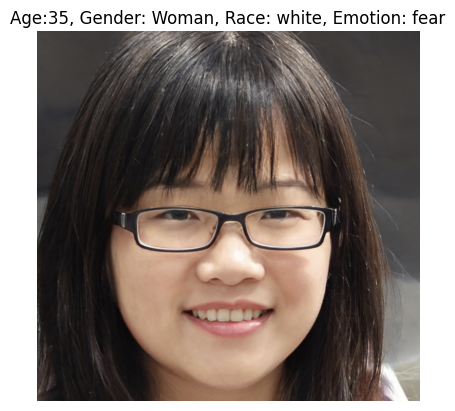

In [11]:
visualize_all_attribute("/content/face_recognition_files/faces_assignment/face1.png", result)


In [17]:
images_path = "/content/face_recognition_files/faces_assignment"


In [18]:
image_paths = [os.path.join(images_path, f) for f in os.listdir(images_path) if f.endswith(('.jpg', '.jpeg', '.png'))]


In [19]:
images_path

'/content/face_recognition_files/faces_assignment'

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]


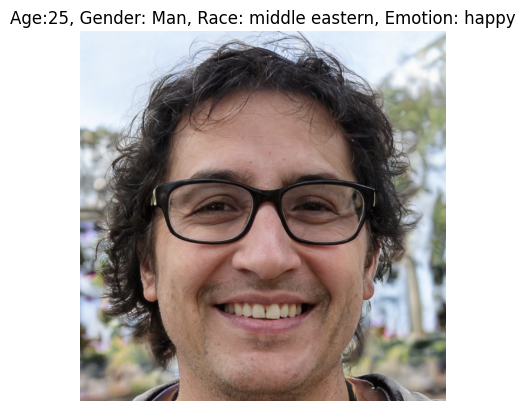

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


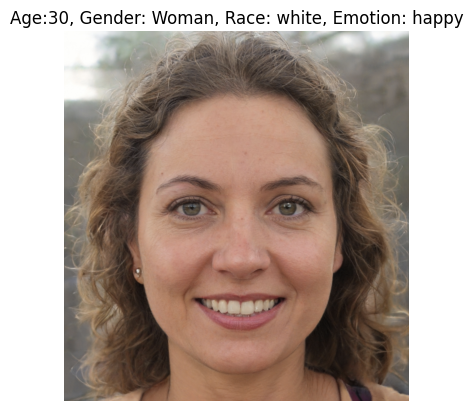

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]


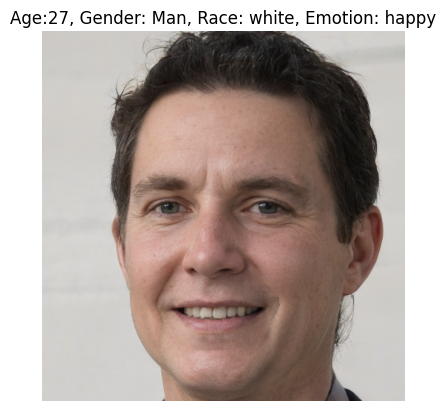

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


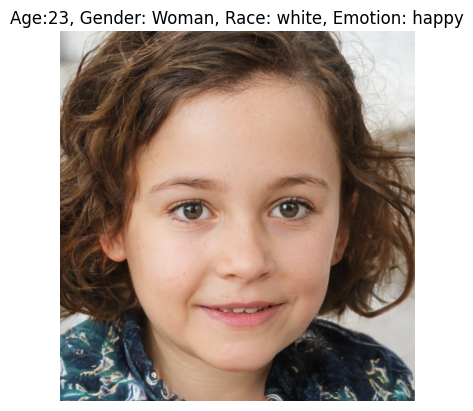

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]


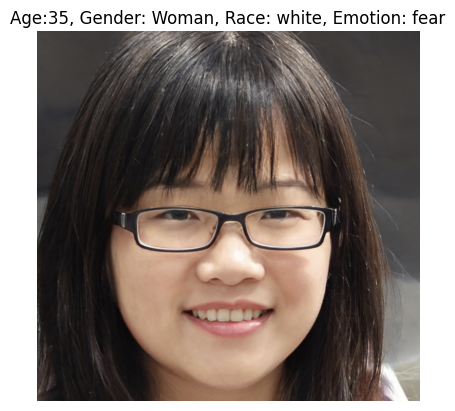

In [20]:
for path in image_paths:

    result = DeepFace.analyze(path, ["age", "gender", "race", "emotion"])

    visualize_all_attribute(path, result)